In [1]:
import h5py
from pathlib import Path
import numpy as  np
from source.helper import to_dB,  print_spectogram, gen_spectogram,diff_frames

Import danych z datasetu

In [2]:
BASE_DIR = Path("D:/Studia/sium/semestr3/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR/'dataset.h5','r')
frames = loaded_file['8']['dataset_8']
# Wybieramy z których anten korzystamy, tx:0 rx:0
frames = frames[:,0,0,:]

Tworzenie spektogramu i printowanie go

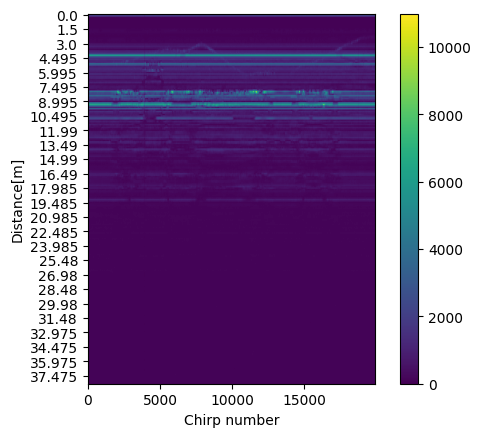

In [3]:
spect, y = gen_spectogram(frames)
print_spectogram(spect, y)

Usunięcie niepotrzebnych danych

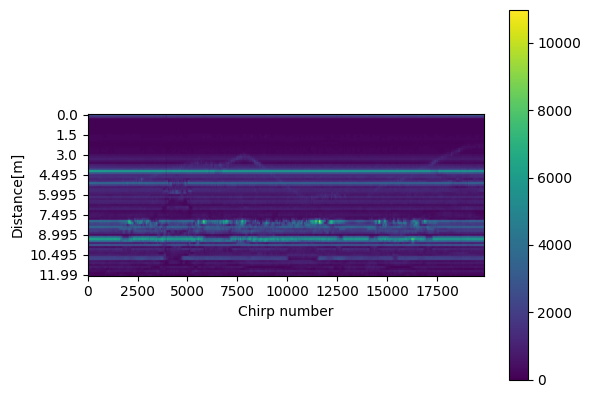

In [4]:
print_spectogram(spect, y, depth_limit=12)

Dodanie skali logarytmicznej

D:\Studia\sium\semestr3\radar-project\source\helper.py:27: RuntimeWarning: divide by zero encountered in log
  return 20 * np.log(np.abs(spectogram))


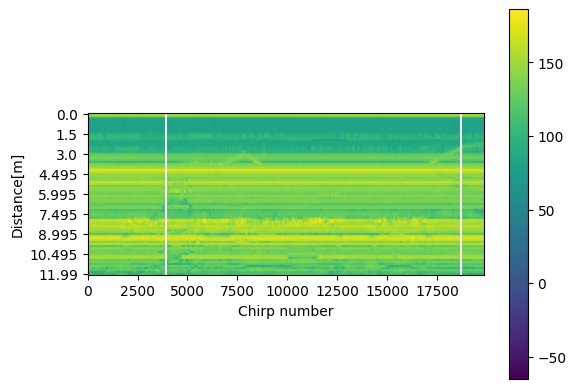

In [5]:
spectdb = to_dB(spect)
print_spectogram(spectdb, y, depth_limit=12)

Tworzenie wykresów różnicowych

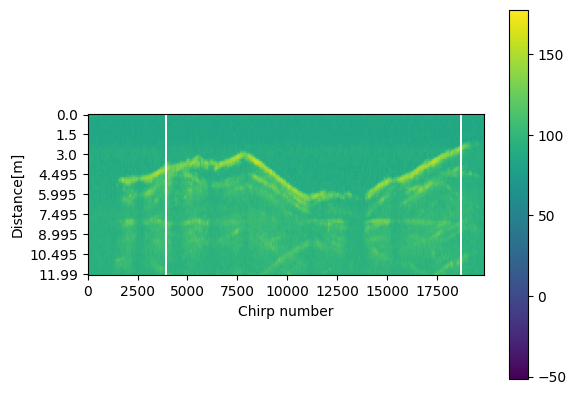

In [7]:
frames_diff = diff_frames(frames,1) #odejmujemy ostatnią klatkę
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=12)

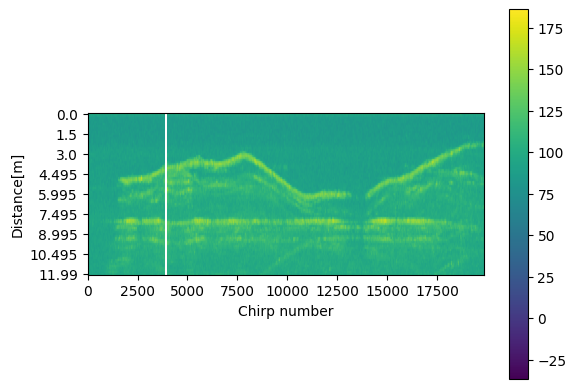

In [8]:
frames_diff = diff_frames(frames,10) #odejmujemy klatkę która wystąpiłą 10 klatek temu, czyli 0,01s (1000/10) temu
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=12)

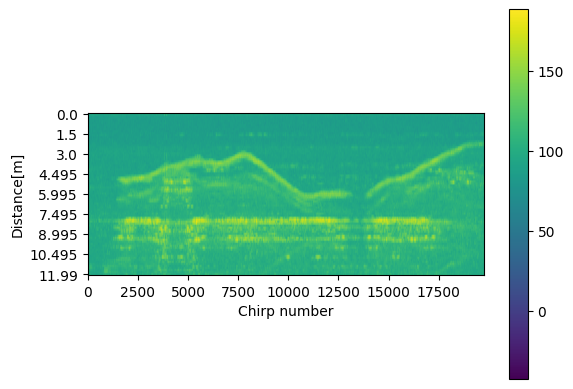

In [9]:
frames_diff = diff_frames(frames,100) #odejmujemy klatkę która wystąpiłą 100 klatek temu, czyli 0,1s (1000/10) temu
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=12)

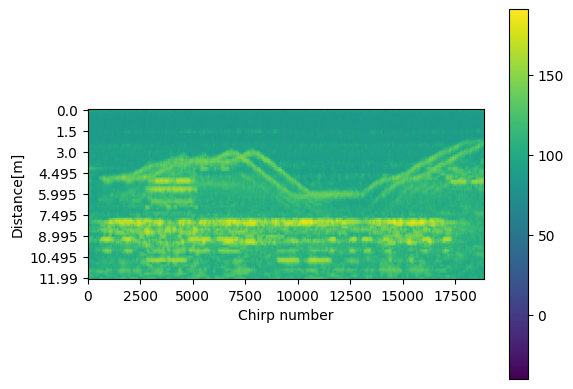

In [10]:
frames_diff = diff_frames(frames,1000) #odejmujemy klatkę która wystąpiłą 100 klatek temu, czyli 1s temu
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=12)